# Load the image data here

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

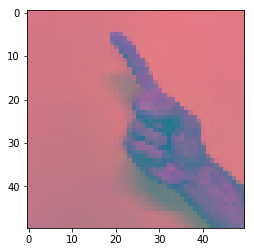

In [44]:
img = Image.open("1/1_IMG_4400.jpg")
datas = img.resize((50,50), Image.NEAREST)
datas = datas.convert('YCbCr')
datas = np.array(datas)
plt.imshow(datas)

### Script di atas berfungsi untuk mengambil data file image berfomat .jpg, kemudian image tersebut di conversi dari RGB menu YCbCr color

array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1]], dtype=uint8)

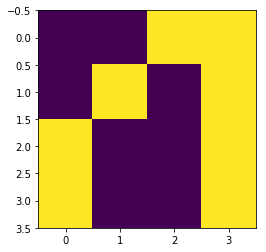

In [73]:
cb_cntrl = datas[:,:,1]
cr_cntrl = datas[:,:,2]
cr_cntrl=np.array([
    [0,0,1,1],
    [0,1,0,1],
    [1,0,0,1],
    [1,0,0,1]
], dtype='uint8')
plt.imshow(cr_cntrl)
cr_cntrl

### Ambil central color (Cr) dari YCbCr image yang sudah dibaca untuk mengambil bentuk dari isarat tangan pada image tersebut

# Moment Invariance Function

In [56]:
def angularSeconMomment(citra):
#     \begin{align*} M= \sum_{x} \sum_{y}I(x,y) \end{align*}
    result=0
    for i in citra:
        for pixel in i:
            result=result+pixel
    return result

def countForMomment(citra, x, y):
    
#     \begin{align*} M_{ij} = \sum_{x} \sum_{y} x^{i} y^{j} I(x,y) \end{align*}
    result = 0
    for i in range(len(citra)):
        for j in range(len(citra[0])):
            result= result + (((i**x)*(j**y))*(citra[i,j]))
    return result

def complexMomment(citra):
    result = np.zeros([4,4])
    for i in range(len(result)):
        for j in range(len(result)):
            result[i,j]=countForMomment(citra,i,j)
    return result

def countTheCentralMomemnt(citra,x1,y1,i,j):
    result=0
    for x in range(len(citra)):
        for y in range(len(citra[0])):
            result = result + (((x-x1)**i)*((y-y1)**j)*citra[x,y])
    return result

def centralMomment(citra,x1,y1):
    cM = np.zeros([4,4])
    for i in range(len(cM)):
        for j in range(len(cM)):
            cM[i,j]=countTheCentralMomemnt(citra,x1,y1,i,j)
    return cM

def centralMomNormilized(cM):
    ncM = np.zeros([len(cM),len(cM)])
    for i in range(len(cM)):
        for j in range(len(cM)):
            y=((i+j)/2)+1
            ncM[i,j]=cM[i,j]/((cM[0,0])**y)
    return ncM

def calculateHuMomment(ncM):
    h0 = ncM[2,0] + ncM[0,2]
    h1 = ((ncM[2,0] - ncM[0,2])**2) + (4*(ncM[1,1])**2)
    h2 = (ncM[3,0] - 3*ncM[1,2])**2 + (3*ncM[2,1] - ncM[0,3])**2
    h3 = (ncM[3,0] + ncM[1,2])**2 + (ncM[2,1] + ncM[0,3])**2
    tmp = ((ncM[3,0]+ncM[1,2])**2) - (3*(ncM[2,1] + ncM[0,3])**2)
    tmp1 = ((3*(ncM[3,0]+ncM[1,2])**2) - ((ncM[2,1] + ncM[0,3])**2))
    h4 = (ncM[3,0] - (3*ncM[1,2])) * (ncM[3,0] + ncM[1,2]) * tmp + ((3*ncM[2,1] - ncM[0,3]) * (ncM[2,1]+ncM[0,3])) * tmp1
    tmp = ((ncM[3,0]+ncM[1,2])**2) - ((ncM[2,1] + ncM[0,3])**2)
    h5 = (ncM[2,0] - ncM[0,2]) * tmp + ((4*ncM[1,1]) * ((ncM[3,0]+ncM[1,2]) * (ncM[2,1]+ncM[0,3])))
    tmp = ((ncM[3,0]+ncM[1,2])**2) - (3*(ncM[2,1] + ncM[0,3])**2)
    tmp1 = ((3*(ncM[3,0]+ncM[1,2])**2) - ((ncM[2,1] + ncM[0,3])**2))
    h6 = ((3* ncM[2,1] - ncM[0,3]) * ((ncM[3,0] + ncM[1,2])) * tmp) - ((ncM[3,0] - (3*ncM[1,2])) * (ncM[2,1] + ncM[0,3])) * tmp1
    h6 = h6 * -1
    
    return [h0,h1,h2,h3,h4,h5,h6]
            

# Moment Invariance with My Code

In [74]:
M = complexMomment(cr_cntrl)
Mii = M[1,0]/M[0,0]
Myy = M[0,1]/M[0,0]
cM =centralMomment(cr_cntrl,Mii,Myy)
ncM = centralMomNormilized(cM)
hu = calculateHuMomment(ncM)
for i in range(len(hu)):
    print("H",i," : " ,hu[i])

H 0  :  0.357421875
H 1  :  0.013980865478515625
H 2  :  0.015853196382522583
H 3  :  0.002902299165725708
H 4  :  7.475419310232214e-06
H 5  :  0.0003265337436459958
H 6  :  1.8212140275863924e-05


# Moment Invariance with Open CV

In [75]:
import cv2
moments = cv2.moments(cr_cntrl)
huMoments = cv2.HuMoments(moments)

In [76]:
hu1 = np.array(huMoments)
hu1 = hu1[:,0]

for i in range(len(huMoments)):
    print(hu1[i],"  \t",hu[i]," \t \t error = ", abs(hu1[i]-hu[i]))

0.357421875   	 0.357421875  	 	 error =  0.0
0.013980865478515625   	 0.013980865478515625  	 	 error =  0.0
0.015853196382522586   	 0.015853196382522583  	 	 error =  3.469446951953614e-18
0.002902299165725708   	 0.002902299165725708  	 	 error =  0.0
7.475419310232213e-06   	 7.475419310232214e-06  	 	 error =  8.470329472543003e-22
0.00032653374364599586   	 0.0003265337436459958  	 	 error =  5.421010862427522e-20
1.8212140275863937e-05   	 1.8212140275863924e-05  	 	 error =  1.3552527156068805e-20
